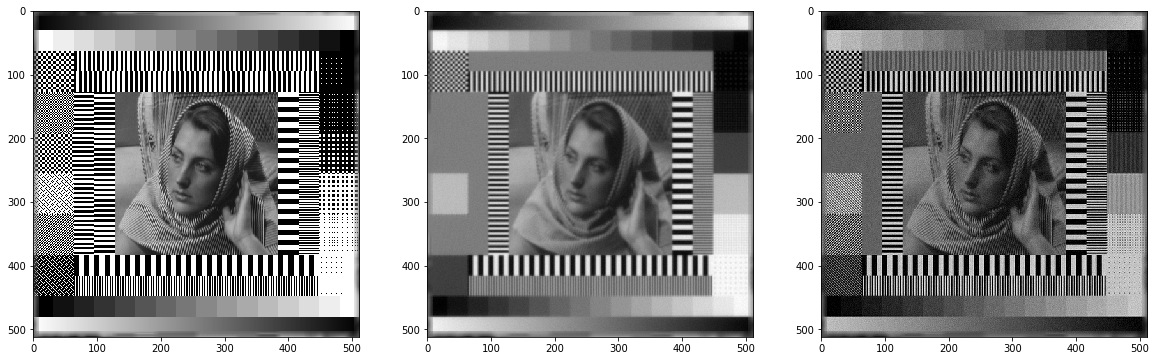

In [25]:
import numpy as np 
from matplotlib import pyplot as plt
from numpy import fft
import skimage
from skimage import io
from helperFunctions import * 
from scipy.interpolate import make_interp_spline, BSpline

folder = 'D:/User/Edward/Downloads/barbara/'
pathGT = 'D:/User/Edward/Downloads/barbara/11.tif' 
pathWI = 'D:/User/Edward/Downloads/barbara/12.tif'
pathOS = 'D:/User/Edward/Downloads/barbara/12.tif'
pathWF = 'D:/User/Edward/Downloads/barbara/WF.tif'

std = 5
width = 10

wf = skimage.io.imread(pathWF)
wf = wf.astype('float')
wf = wf/np.amax(wf)
wf = edgeTaper(wf,drawGauss (std,width))

truth = skimage.io.imread(pathGT)
truth = truth.astype('float')
truth = truth/np.amax(truth)
truth = edgeTaper(truth,drawGauss (std,width))

wicker = skimage.io.imread(pathWI)
wicker = wicker.astype('float')
wicker = wicker/np.amax(wicker)
wicker = edgeTaper(wicker,drawGauss (std,width))

os = skimage.io.imread(pathOS)
os = os.astype('float')
os = os/np.amax(os)
os = edgeTaper(os,drawGauss (std,width))

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.imshow(truth, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(wf, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(os, cmap='gray')
plt.show()

In [26]:
FTt = np.fft.fftshift(np.fft.fft2(truth))
FTwf = np.fft.fftshift(np.fft.fft2(wf))
FTwi = np.fft.fftshift(np.fft.fft2(wicker))
FTos = np.fft.fftshift(np.fft.fft2(os))


C:\Users\ed_wa.DESKTOP-6TG1D20\Python work\Python classes\helperFunctions.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  profileSums[thisDistance] = profileSums[thisDistance] + img[row, column]
D:\User\Edward\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
D:\User\Edward\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
D:\User\Edward\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
D:\User\Edward\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\User\Edward\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
D:\User\Edward\Anaconda\lib\site-packages\i

<function matplotlib.pyplot.show(*args, **kw)>

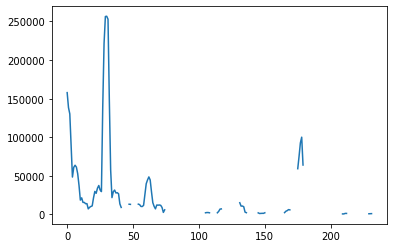

In [27]:
dims = FTt.shape
r_max = int(np.floor(dims[0]/2))

denom = getProfileCounts(FTos*np.conj(FTt))
num = np.sqrt(getProfileCounts(FTos)*getProfileCounts(FTt))
frcOS = denom/num
frcOS = np.convolve(frcOS, np.ones((5,))/5, mode='valid')

denom = getProfileCounts(FTwf*np.conj(FTt))
num = np.sqrt(getProfileCounts(FTwf)*getProfileCounts(FTt))
frcWF = denom/num

denom = getProfileCounts(FTwi*np.conj(FTt))
num = np.sqrt(getProfileCounts(FTwi)*getProfileCounts(FTt))
frcWI = denom/num

Xs = np.linspace(1,r_max,r_max)
plt.plot(np.real(frcOS))
plt.show